World Suicide Rate Analysis

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings

In [3]:
warnings.filterwarnings("ignore")

In [4]:
import matplotlib.pyplot as plt

In [5]:
url = 'https://raw.githubusercontent.com/Sriram-Sudharsan/Analytics-CrimeData/main/CrimeDataSet.csv'
df = pd.read_csv(url)

In [6]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [7]:
df.drop('country-year',axis=1,inplace=True)

In [8]:
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,0.675,"63,067,077,179",2309,Generation Z


Overview of the dataset

In [9]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   HDI for year        8364 non-null   float64
 8    gdp_for_year ($)   27820 non-null  object 
 9   gdp_per_capita ($)  27820 non-null  int64  
 10  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 2.3+ MB


Formatting the feature names and data types for easier access

Also converting GDP for Year into integer type

In [11]:
df[' gdp_for_year ($) ']=df[' gdp_for_year ($) '].str.replace(',',"")
df['GDP for year'] = df[' gdp_for_year ($) '].astype("int64")
df['GDP per capita'] = df['gdp_per_capita ($)'].astype("int64")

Post changes

In [12]:
df.drop([' gdp_for_year ($) ', 'gdp_per_capita ($)'], axis = 1, inplace = True)
df[["country", "sex", "generation", "age"]] = df[["country", "sex", "generation", "age"]].apply(lambda x: x.astype('category'))
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   country            27820 non-null  category
 1   year               27820 non-null  int64   
 2   sex                27820 non-null  category
 3   age                27820 non-null  category
 4   suicides_no        27820 non-null  int64   
 5   population         27820 non-null  int64   
 6   suicides/100k pop  27820 non-null  float64 
 7   HDI for year       8364 non-null   float64 
 8   generation         27820 non-null  category
 9   GDP for year       27820 non-null  int64   
 10  GDP per capita     27820 non-null  int64   
dtypes: category(4), float64(2), int64(5)
memory usage: 1.6 MB


In [13]:
df['age'].unique()


['15-24 years', '35-54 years', '75+ years', '25-34 years', '55-74 years', '5-14 years']
Categories (6, object): ['15-24 years', '35-54 years', '75+ years', '25-34 years', '55-74 years',
                         '5-14 years']

In [14]:
df['generation'].unique()

['Generation X', 'Silent', 'G.I. Generation', 'Boomers', 'Millenials', 'Generation Z']
Categories (6, object): ['Generation X', 'Silent', 'G.I. Generation', 'Boomers', 'Millenials',
                         'Generation Z']

Visualisation for distribution of total number of Suicides

Text(0.5, 1.0, 'NUMBER OF SUICIDES')

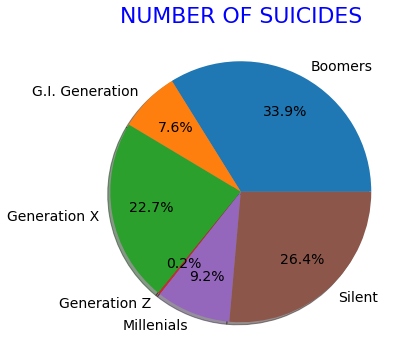

In [15]:

f, (ax1) = plt.subplots(1, figsize=(15,6))
grouped_gen1=df.groupby("generation")['suicides_no'].sum()
x1=grouped_gen1.index.tolist()
y1=grouped_gen1.values.tolist()
ax1.pie(y1,labels=x1, autopct='%1.1f%%', shadow=True, pctdistance=0.7, textprops={'fontsize': 14})
ax1.set_title("NUMBER OF SUICIDES", fontsize=22, color='b')

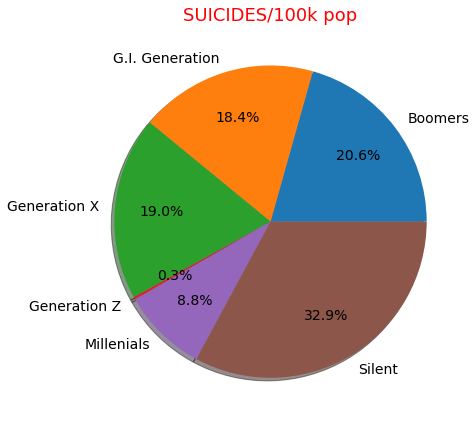

In [16]:
f, (ax2) = plt.subplots(1, figsize=(15,6))
grouped_gen2=df.groupby("generation")['suicides/100k pop'].sum()
x2=grouped_gen2.index.tolist()
y2=grouped_gen2.values.tolist()
ax2.pie(y2,labels=x2, autopct='%1.1f%%', shadow=True, pctdistance=0.7, textprops={'fontsize': 14})
ax2.set_title("SUICIDES/100k pop", fontsize=18, color='r')
plt.tight_layout()
plt.draw()

Discarding HDI feature 


In [17]:
df.drop(['HDI for year'], inplace=True, axis = 1)


To identify whether suicide rates have a correlation with a country's tier, we generate a list of first, second and third world countries.

In [18]:
developed = ['Israel', 'Singapore', 'Denmark', 'Finland', 'Norway', 'Ireland',
              'New Zeland', 'Slovenia', 'Estonia', 'Cyprus', 'Luxembourg', 'Iceland','United States', 'Germany', 'Japan', 'Turkey', 'United Kingdom', 'France', 'Italy', 'South Korea',
              'Spain', 'Canada', 'Australia', 'Netherlands', 'Belgium', 'Greece', 'Portugal', 
              'Sweden', 'Austria', 'Switzerland' ]

In [19]:
developing=['Albania', 'Armenia', 'Lithuania', 'Latvia', 'Brazil', 'Chile', 'Argentina',
               'China', 'India', 'Bolivia', 'Romenia','Russian Federation', 'Ukraine', 'Poland', 'Uzbekistan', 'Romania', 'Kazakhstan', 'Azerbaijan', 'Czech Republic',
               'Hungary', 'Belarus', 'Tajikistan', 'Serbia', 'Bulgaria', 'Slovakia', 'Croatia', 'Maldova', 'Georgia',
               'Bosnia And Herzegovina']


In [20]:

countries = []
for i in range(len(df)):
    
    if df['country'][i] in developed:
        countries.append(1)
    elif df['country'][i] in developing:
        countries.append(2)
    else:
        countries.append(3)

df['country_tier'] = countries

### **Suicide vs Age**







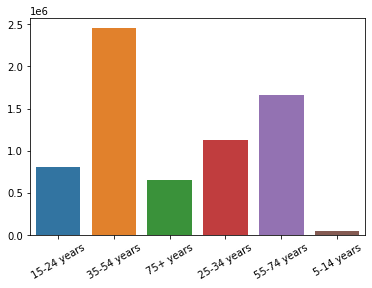

In [21]:

suicides_per_age_grp = []

for i in df['age'].unique():
    suicides_per_age_grp.append(sum(df[df['age'] == i]['suicides_no']))

plt.xticks(rotation=30)
sns.barplot(x = df['age'].unique(), y = suicides_per_age_grp)

Suicide vs Sex

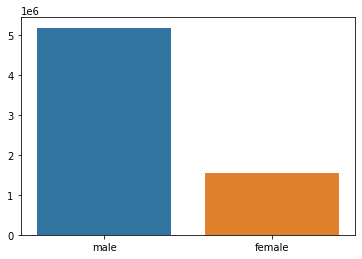

In [22]:

suicides_per_sex = []

for i in df['sex'].unique():
    suicides_per_sex.append(sum(df[df['sex'] == i]['suicides_no']))

sns.barplot(x = df['sex'].unique(), y = suicides_per_sex)

Suicide vs Sex and Age

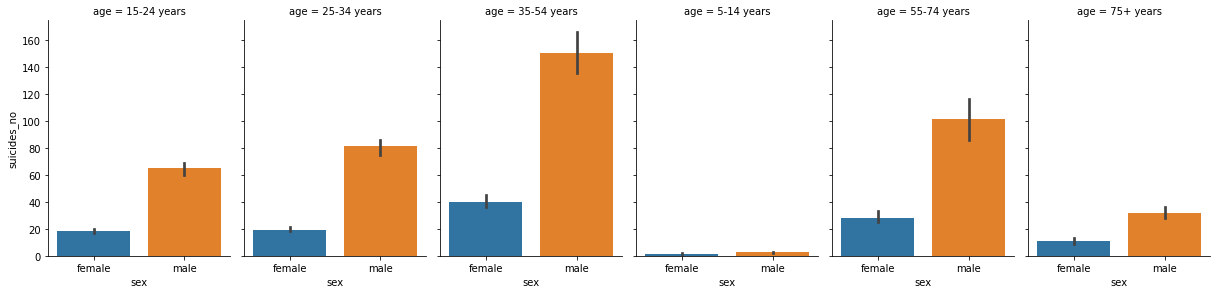

In [23]:

sns.catplot(x='sex', y='suicides_no',col='age', data=df, estimator=np.median,height=4, aspect=.7,kind='bar')


A brief glance indicates that male suicides are higher than female suicides across all age groups.

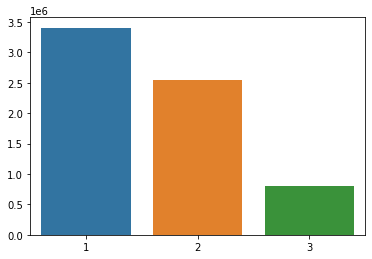

In [24]:
suicides_per_tier = []
for w in df['country_tier'].unique():
    suicides_per_tier.append(sum(df[df['country_tier'] == w]['suicides_no']))
    
sns.barplot(x = df['country_tier'].unique(), y = suicides_per_tier)

Suicides vs Population

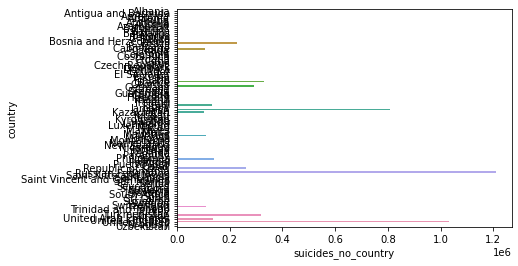

In [29]:
suicides_no_country=[]
for i in df['country'].unique():
  suicides_no_country.append(sum(df[df['country'] == i]['suicides_no']))
n_suicides_country = pd.DataFrame(suicides_no_country, columns=['suicides_no_country'])
n_suicides_country['country'] = df['country'].unique()

quant = 15
top_country = n_suicides_country.sort_values('suicides_no_country', ascending=False)['country'][:quant]
top_suicides = n_suicides_country.sort_values('suicides_no_country', ascending=False)['suicides_no_country'][:quant]
sns.barplot(x = top_suicides, y = top_country)

Due to the non uniform nature of the data, it is not possible to come to a valid conclusion. Hence, we normalise them by comparing the rates across a population of 100k across each subset

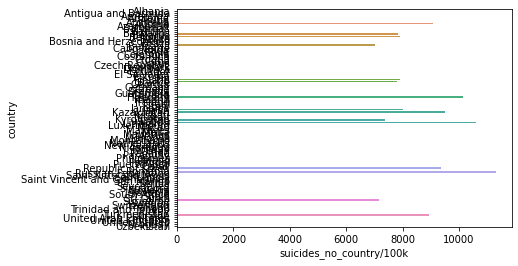

In [35]:
suicides_no_country = []
for c in df['country'].unique():
    suicides_no_country.append(sum(df[df['country'] == c]['suicides/100k pop']))
    
n_suicides_country = pd.DataFrame(suicides_no_country, columns=['suicides_no_country/100k'])
n_suicides_country['country'] = df['country'].unique()

quant = 15
top_country = n_suicides_country.sort_values('suicides_no_country/100k', ascending=False)['country'][:quant]
top_suicides = n_suicides_country.sort_values('suicides_no_country/100k', ascending=False)['suicides_no_country/100k'][:quant]
sns.barplot(x = top_suicides, y = top_country)